## **DAI Assignment 1**

#### Kavy Vaghela
#### 23114105

## **1. Data Cleaning**

### **Load the data and analyzing its structure**


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("best-selling-manga.csv")
df.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ KB


In [7]:
df.isnull().sum() # To get count of NaN values in the dataset

Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

### **Adding ditry data**
Since my data is already clean here is a script to generate random dirty data and concatenate it to the end

In [9]:
def generate_dirty_data(n=20, seed=42):
    
    np.random.seed(seed)
    
    # Randomly generate data
    manga_series = [f"Manga {i}" for i in range(n)]
    authors = [f"Author {i}" for i in range(n)]
    publishers = np.random.choice(["Shueisha", "Kodansha", "Hakusensha", None], size=n)
    demographics = np.random.choice(["Shonen", "Seinen", "Josei", None], size=n)
    volumes = np.random.randint(1, 100, size=n)
    serialized = [f"{np.random.randint(1980, 2025)}-ongoing" if np.random.rand() > 0.5 else None for _ in range(n)]
    sales_millions = np.round(np.random.uniform(10, 500, size=n), 2)
    avg_sales_per_volume = np.round(sales_millions / volumes, 2)
    
    data = {
        "Manga series": manga_series,
        "Author(s)": authors,
        "Publisher": publishers,
        "Demographic": demographics,
        "No. of collected volumes": volumes,
        "Serialized": serialized,
        "Approximate sales in million(s)": sales_millions,
        "Average sales per volume in million(s)": avg_sales_per_volume
    }
    
    
    df = pd.DataFrame(data)
    
    # If a row doesn't have null value add null value
    for i in range(df.shape[0]):
        if df.iloc[i].notna().all():  
            col = np.random.choice(df.columns)  
            df.at[i, col] = None  
    
    return df

In [10]:
n=37
df_dirty = generate_dirty_data(n)
# df_dirty.isnull().any(axis=1).sum()
# df_dirty.isnull().sum()
df = pd.concat([df, generate_dirty_data(n)], ignore_index=True)
df.tail() # To display the dirty data added

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
219,Manga 32,Author 32,None,Seinen,72.0,2016-ongoing,253.65,3.52
220,Manga 33,Author 33,Kodansha,Seinen,78.0,None,157.43,2.02
221,Manga 34,Author 34,Kodansha,Seinen,87.0,None,149.57,1.72
222,Manga 35,None,Shueisha,Shonen,62.0,2015-ongoing,28.07,0.45
223,Manga 36,Author 36,None,Seinen,40.0,1986-ongoing,308.69,7.72


In [11]:
df.isnull().sum()

Manga series                               2
Author(s)                                  2
Publisher                                 13
Demographic                               10
No. of collected volumes                   1
Serialized                                20
Approximate sales in million(s)            1
Average sales per volume in million(s)     1
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            222 non-null    object 
 1   Author(s)                               222 non-null    object 
 2   Publisher                               211 non-null    object 
 3   Demographic                             214 non-null    object 
 4   No. of collected volumes                223 non-null    float64
 5   Serialized                              204 non-null    object 
 6   Approximate sales in million(s)         223 non-null    float64
 7   Average sales per volume in million(s)  223 non-null    float64
dtypes: float64(3), object(5)
memory usage: 14.1+ KB


Since the dirty data was added externally we can directly remove the rows with null values

In [13]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    float64
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(3), object(5)
memory usage: 11.8+ KB


### **Removing Columns**



drop method

In [15]:
tmp = df.drop("Demographic", axis=1) # Only see how to drop and not actually drop
tmp.drop("Serialized", axis=1, inplace=True)
tmp.drop("Publisher", axis=1, inplace=True)
tmp.head()

,Manga series,Author(s),No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,104.0,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",207.0,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,102.0,270.0,2.65
3,Dragon Ball,Akira Toriyama,42.0,260.0,6.19
4,Doraemon,Fujiko F. Fujio,45.0,250.0,4.71


### **Plotting Boxplot for Detection of Outliers**

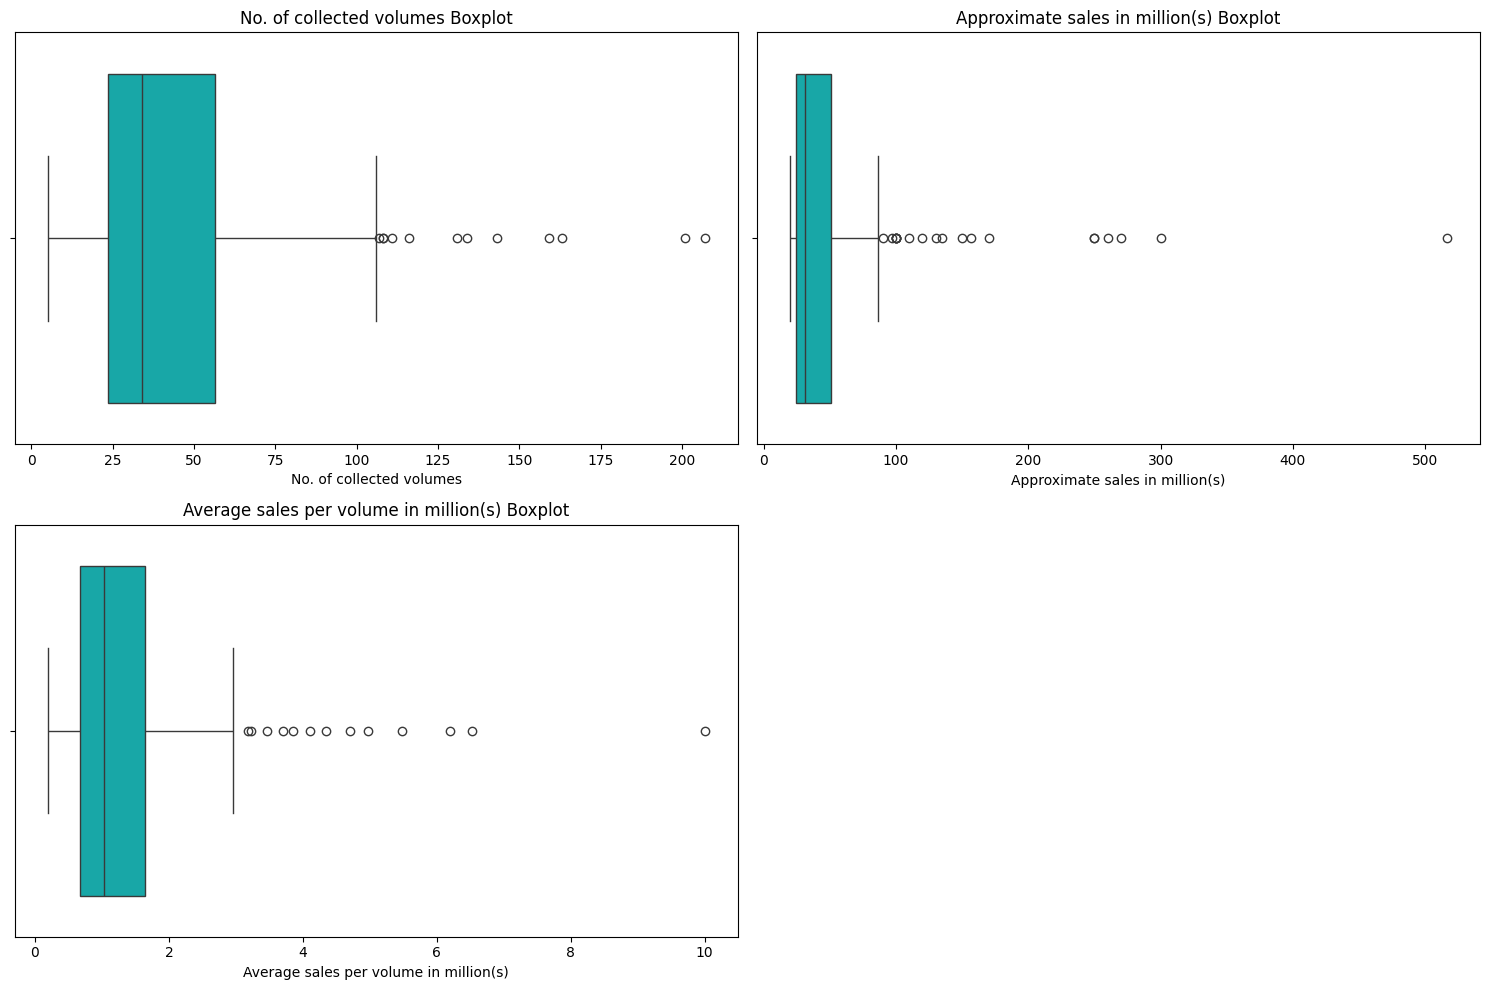

In [16]:
numerical_cols = ["No. of collected volumes", "Approximate sales in million(s)", "Average sales per volume in million(s)"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i)
    sns.boxplot(x=df[col], color='c')
    plt.title(f"{col} Boxplot")
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

Checking the outliners in No. of collected volumes

In [17]:
df.nlargest(5, "No. of collected volumes")


,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207.0,1968–present,300.0,1.45
7,KochiKame: Tokyo Beat Cops,Osamu Akimoto,Shueisha,Shōnen,201.0,1976–2016,156.5,0.78
70,Cooking Papa,Tochi Ueyama,Kodansha,Seinen,163.0,1985–present,40.0,0.24
45,Minami no Teiō,"Dai Tennōji, Rikiya Gō",Nihon Bungeisha,Shōnen,159.0,1992–present,53.0,0.33
21,Baki the Grappler,Keisuke Itagaki,Akita Shoten,Shōnen,143.0,1991–present,85.0,0.59


In [18]:
skew1 = df["No. of collected volumes"].skew()
skew2 = df["Approximate sales in million(s)"].skew()
skew3 = df["Average sales per volume in million(s)"].skew()
print(f"Skewness of No. of collected volumes: {skew1}")
print(f"Skewness of Approximate sales in million(s): {skew2}")
print(f"Skewness of Average sales per volume in million(s): {skew3}")

Skewness of No. of collected volumes: 1.9874711033469454
Skewness of Approximate sales in million(s): 4.554844889918579
Skewness of Average sales per volume in million(s): 3.177346842209337


- **The skewness of the column 'No. of collected volumes' is moderately high (1.99). Therefore, using the IQR method to remove outliers is a suitable approach, as it effectively handles right-skewed distributions without removing too many valid data points.**  

- **The skewness of 'Approximate sales in million(s)' is significantly high (4.55), indicating a highly right-skewed distribution. The IQR method is appropriate for outlier removal in this case, as extreme sales values could heavily influence analysis.**  

- **The skewness of 'Average sales per volume in million(s)' is also high (3.18), suggesting that the data is not normally distributed. Since extreme values might distort insights, the IQR method can be used to remove outliers while preserving the general distribution of the dataset.**

Appling IQR on No. of collected volumes

In [19]:
Q1 = df['No. of collected volumes'].quantile(0.25)
Q3 = df['No. of collected volumes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['No. of collected volumes'] < lower_bound) | (df['No. of collected volumes'] > upper_bound)].shape[0]
df = df[~((df['No. of collected volumes'] < lower_bound) | (df['No. of collected volumes'] > upper_bound))]
print("The Number of Outliers in 'No. of collected volumes':", outliers)
print("The Shape of the DataFrame after Removing Outliers:", df.shape)


The Number of Outliers in 'No. of collected volumes': 12
The Shape of the DataFrame after Removing Outliers: (175, 8)


Appling IQR for Approximate sales in million(s)

In [20]:
Q1 = df['Approximate sales in million(s)'].quantile(0.25)
Q3 = df['Approximate sales in million(s)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Approximate sales in million(s)'] < lower_bound) | (df['Approximate sales in million(s)'] > upper_bound)].shape[0]
df = df[~((df['Approximate sales in million(s)'] < lower_bound) | (df['Approximate sales in million(s)'] > upper_bound))]
print("The Number of Outliers in 'Approximate sales in million(s)':", outliers)
print("The Shape of the DataFrame after Removing Outliers:", df.shape)


The Number of Outliers in 'Approximate sales in million(s)': 14
The Shape of the DataFrame after Removing Outliers: (161, 8)


Appling IQR for Average sales per volume in million(s)

In [21]:
Q1 = df['Average sales per volume in million(s)'].quantile(0.25)
Q3 = df['Average sales per volume in million(s)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Average sales per volume in million(s)'] < lower_bound) | (df['Average sales per volume in million(s)'] > upper_bound)].shape[0]
df = df[~((df['Average sales per volume in million(s)'] < lower_bound) | (df['Average sales per volume in million(s)'] > upper_bound))]
print("The Number of Outliers in 'Average sales per volume in million(s)':", outliers)
print("The Shape of the DataFrame after Removing Outliers:", df.shape)


The Number of Outliers in 'Average sales per volume in million(s)': 4
The Shape of the DataFrame after Removing Outliers: (157, 8)


#### **Standardizing Categorical Values**

Dropping The **'Manga series'** and **'Author(s)'** column as they do not help in our Analysis of the dataset

In [22]:
df.drop(columns=["Manga series", "Author(s)"], inplace=True)

Converting all text to **lowercase/uppercase** and striping **whitespace** for consistency.

In [23]:
categorical_cols = ['Publisher', 'Demographic', 'Serialized']

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.title()  # Strip whitespace & convert to title case

# Display the first few rows to verify changes
df.head()


,Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
20,Kodansha,—,45.0,1946–1974,86.0,1.91
22,Shueisha,Shōnen,37.0,2014–Present,85.0,2.29
23,Shueisha,Shōnen,37.0,1998–Present (On Hiatus),84.0,2.33
24,Kodansha,Seinen,37.0,1998–2015 (On Hiatus),82.0,2.21
26,Ushio Shuppansha,Shōnen,60.0,1971–1986,80.0,1.33


In [24]:
# Define the valid demographic values
valid_demographics = ["Shōnen", "Seinen", "Shōjo"]

# Keep only rows where 'Demographic' is in the valid list
df = df[df['Demographic'].isin(valid_demographics)]

# Display the shape after filtering
print("Shape after filtering:", df.shape)

Shape after filtering: (147, 6)


## **2. Exploratory Data Analysis**


### **Univariate Analysis**

#### Getting the Statistical Information of the Numerical Columns

In [25]:
#Statistical Analysis of the data 

selected_df = df[numerical_cols]

# Compute summary statistics
summary_stats = selected_df.describe().T  # Transpose for better readability
summary_stats["mode"] = selected_df.mode().iloc[0]  # Mode
summary_stats["variance"] = selected_df.var()  # Variance
summary_stats["skewness"] = selected_df.skew()  # Skewness
summary_stats

,count,mean,std,min,25%,50%,75%,max,mode,variance,skewness
No. of collected volumes,147.0,38.299320,22.398145,8.00,22.500,33.0,47.50,106.00,18.00,501.676917,1.337255
Approximate sales in million(s),147.0,34.337619,15.363095,20.00,22.500,30.0,45.00,85.00,20.00,236.024677,1.316218
Average sales per volume in million(s),147.0,1.131088,0.625784,0.24,0.655,1.0,1.48,2.77,1.42,0.391606,0.777469


#### Plotting Plots of Categorical Columns

Frequency Distribution for column Publisher :
Publisher
Shueisha           50
Kodansha           40
Shogakukan         24
Akita Shoten       10
Hakusensha          7
Futabasha           2
Shōnen Gahōsha      2
Nihon Bungeisha     2
Square Enix         2
Kadokawa Shoten     2
Name: count, dtype: int64




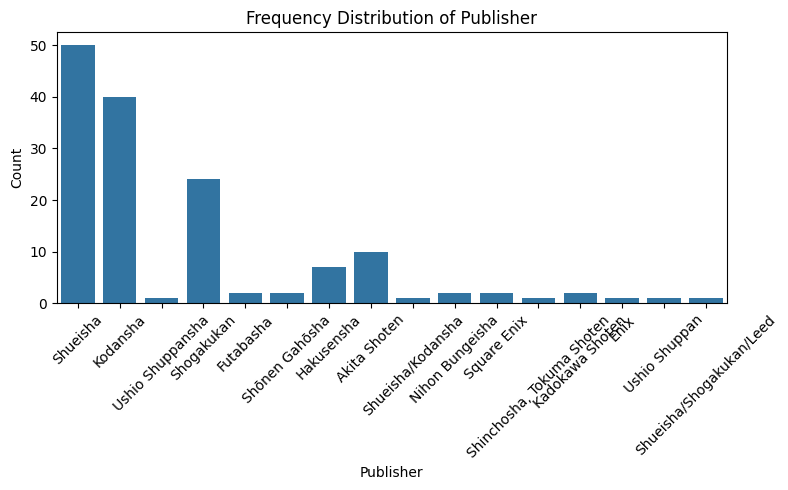

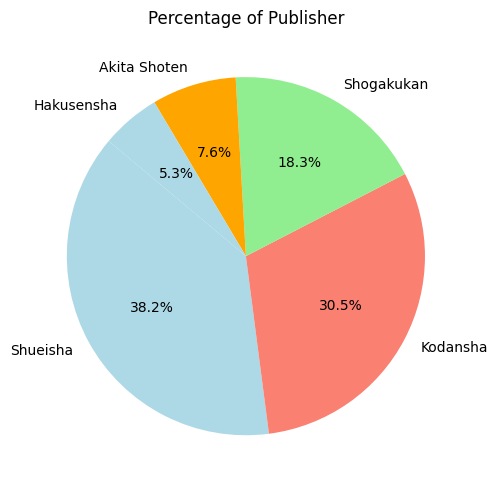

In [26]:
# Frequency Distribution
col = "Publisher"
publishers = df[col].value_counts()
print("Frequency Distribution for column %s :" % col)
print(publishers[publishers > 1])
print("\n")

# Countplot (Bar Chart)
plt.figure(figsize=(8, 5))
sns.countplot(x=df[col])
plt.title(f"Frequency Distribution of {col}", fontsize=12)
plt.xlabel(col, fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 5))
plt.pie(publishers[publishers > 2], labels=publishers[publishers > 2].index, 
        autopct="%1.1f%%", startangle=140, colors=["lightblue", "salmon", "lightgreen", "orange"])
plt.title(f"Percentage of {col}", fontsize=12)
plt.tight_layout()
plt.show()

Frequency Distribution for column Demographic :
Demographic
Shōnen    82
Seinen    44
Shōjo     21
Name: count, dtype: int64




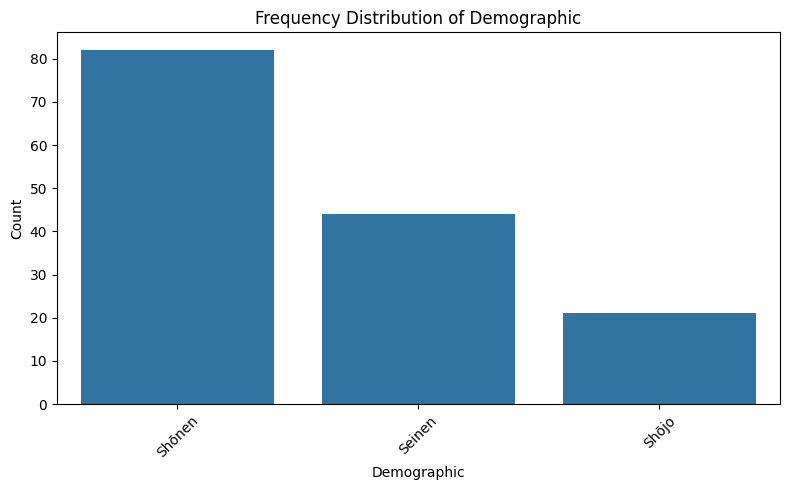

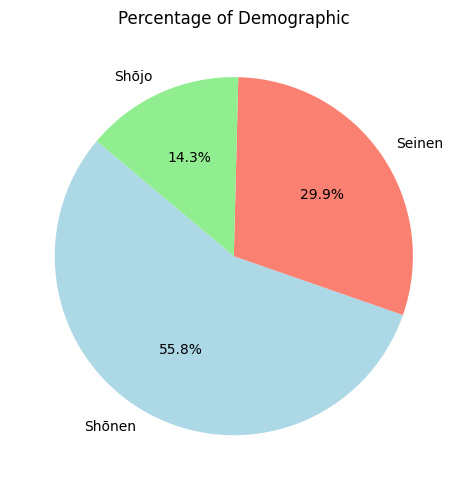

In [51]:
# Frequency Distribution
col = "Demographic"
demographics = df[col].value_counts()
print("Frequency Distribution for column %s :" % col)
print(demographics[demographics > 1])
print("\n")

# Countplot (Bar Chart)
plt.figure(figsize=(8, 5))
sns.countplot(x=df[col])
plt.title(f"Frequency Distribution of {col}", fontsize=12)
plt.xlabel(col, fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 5))
plt.pie(demographics[demographics > 1], labels=demographics[demographics > 1].index, 
        autopct="%1.1f%%", startangle=140, colors=["lightblue", "salmon", "lightgreen", "orange"])
plt.title(f"Percentage of {col}", fontsize=12)
plt.tight_layout()
plt.show()

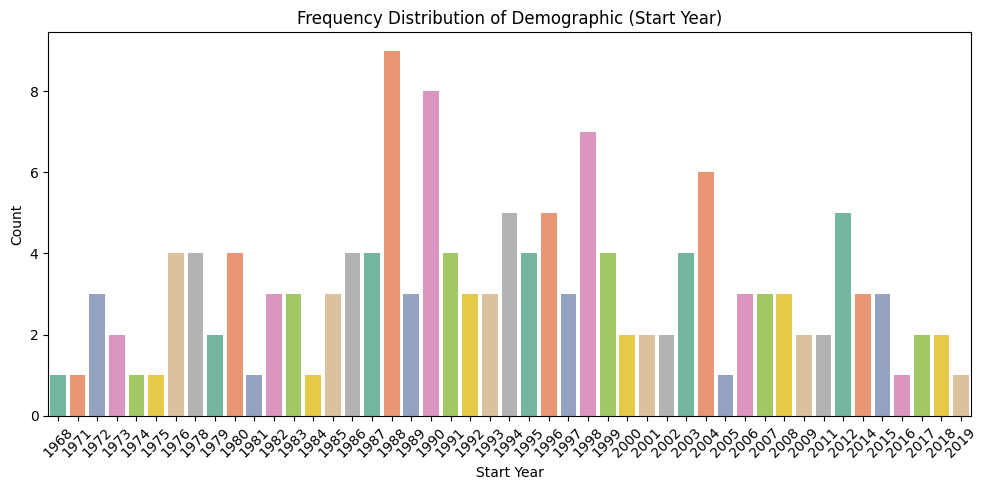

In [28]:
# df.head()
serialized = df['Serialized'].str.extract(r'(\d{4})')[0].astype(int)

# Count occurrences of each start year
start_year_counts = serialized.value_counts().sort_index()

# Countplot (Bar Chart)
plt.figure(figsize=(10, 5))
sns.countplot(x=serialized, order=start_year_counts.index, palette="Set2")
plt.title(f"Frequency Distribution of {col} (Start Year)", fontsize=12)
plt.xlabel("Start Year", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **Frequency Distribution Analysis of Categorical Variables in the Best-Selling Manga Dataset**

---

##### **Publisher Distribution**
- **Shueisha** is the dominant publisher, accounting for **65 manga series**.
- **Kodansha** follows with **50 series**, and **Shogakukan** ranks third with **32 series**.
- Other publishers like **Akita Shoten, Hakusensha, and Nihon Bungeisha** have significantly fewer entries.
- The dominance of Shueisha, Kodansha, and Shogakukan aligns with their control over major manga magazines like **Shonen Jump, Weekly Shonen Magazine, and Weekly Shonen Sunday**.

---

##### **Demographic (Target Audience) Distribution**
- **Shōnen (Young Male Audience)** is the most common demographic, representing **101 series (over half the dataset)**.
- **Seinen (Adult Male Audience)** follows with **50 series**, reflecting demand for mature storytelling.
- **Shōjo (Young Female Audience)** accounts for **21 series**, indicating lower representation compared to male-oriented categories.
- **Children, Josei (Adult Women), and Mixed Demographics (e.g., Shōnen/Seinen)** have relatively few entries.
- The dominance of **Shōnen** suggests action-packed, adventure-focused narratives sell the most.

---

##### **Serialization Start Year Distribution (Top 10 Years)**
- The most common start year is **1988 (11 series)**, followed by **1990 (10 series)**.
- Other significant years include **1998 (7 series), 1997 (6 series), and 1994 (6 series)**.
- This suggests that many best-selling manga series started in the **late 1980s to early 2000s**, reinforcing the idea that long-running series tend to accumulate high sales over time.

---

##### **Key Takeaways**
- **Shueisha, Kodansha, and Shogakukan dominate manga publishing**, contributing most of the best-selling titles.
- **Shōnen manga has the highest representation**, reflecting its commercial success.
- **Most successful series started serialization between the late 1980s and early 2000s**, indicating that longevity plays a role in overall sales.

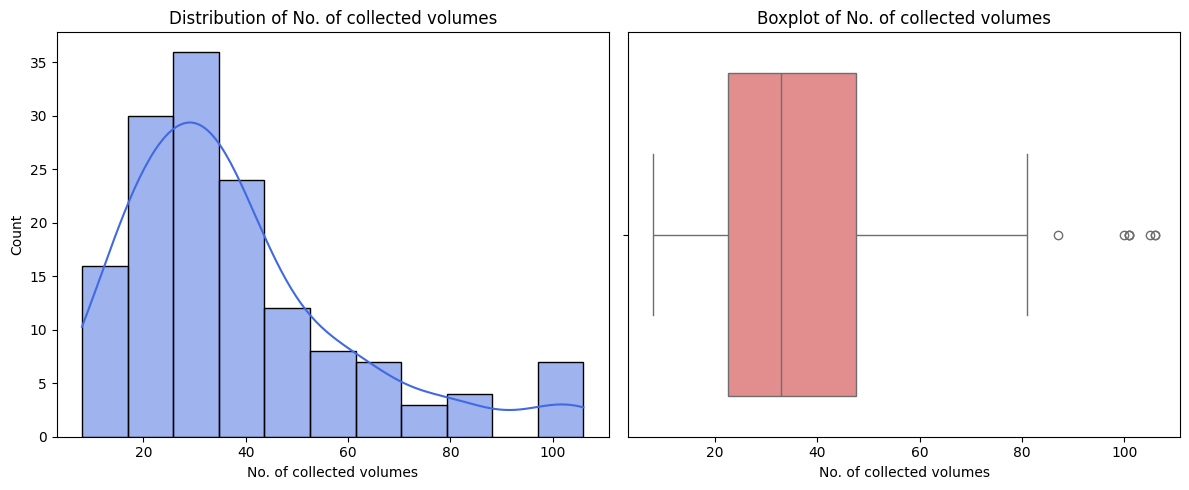

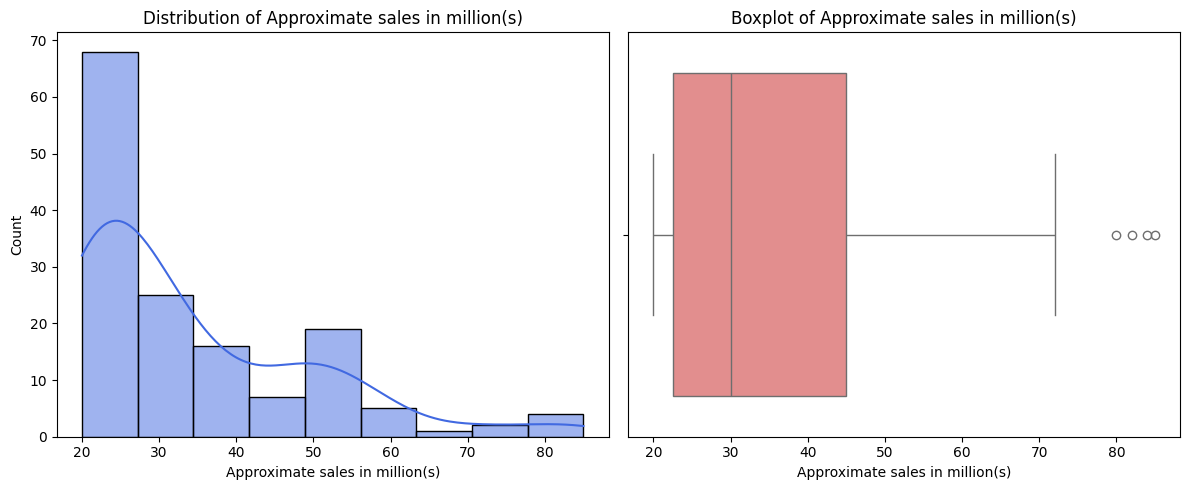

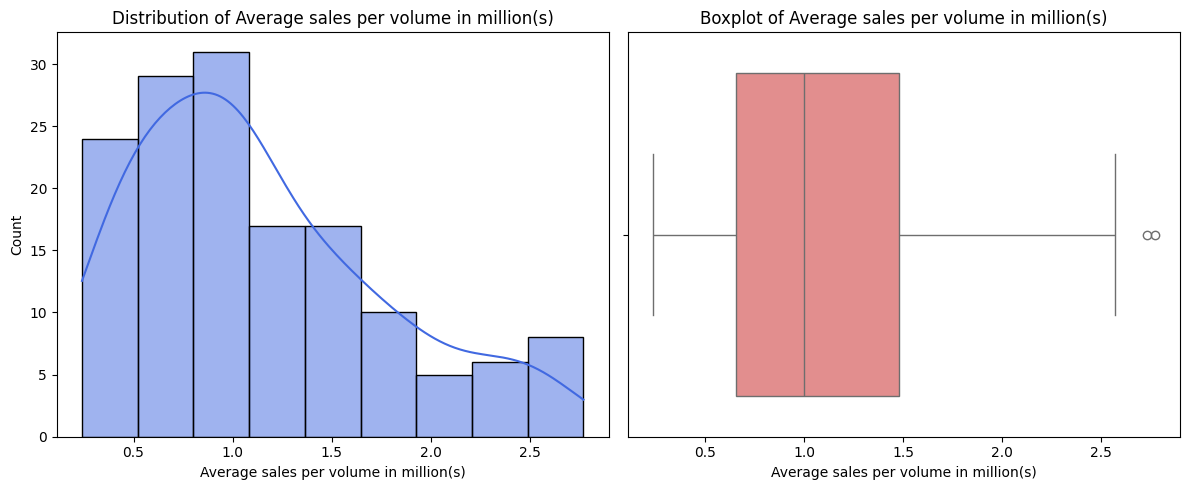

In [29]:
# Plot histograms and boxplots
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Two subplots per row

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color="royalblue")
    axes[0].set_title(f"Distribution of {col}", fontsize=12)

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="lightcoral")
    axes[1].set_title(f"Boxplot of {col}", fontsize=12)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()



##### **Sales and Volume Distribution Analysis in the Best-Selling Manga Dataset**  

Histograms and boxplots provide insights into **distribution, skewness, and the presence of outliers** in numerical features. Below is the analysis for **Approximate Sales, Average Sales per Volume, and Number of Collected Volumes**.  

---

##### **Approximate Sales Distribution**  
- The **sales distribution is right-skewed**, meaning a few manga series have exceptionally high sales.  
- **Most series have sales below 100 million copies**, but a few (e.g., *One Piece*, *Golgo 13*) have **exceptionally high sales**, acting as outliers.  
- This suggests that **a small number of manga dominate total sales**, while most have **moderate success**.  

---

##### **Average Sales per Volume Distribution**  
- This feature is **highly right-skewed**, showing that **most manga sell fewer copies per volume**.  
- However, some series have **extremely high per-volume sales**, likely indicating **short but highly successful runs** (*e.g., Dragon Ball, Demon Slayer*).  
- The **longer a series runs, the lower its per-volume sales tend to be**, as sales get spread out across more volumes.  

---

##### **Number of Collected Volumes Distribution**  
- **Most manga have fewer than 50 volumes**, with a peak around 10-30 volumes.  
- A few series (**e.g., Golgo 13, Kochikame**) have **over 100 volumes**, making them extreme outliers.  
- **Longer series don’t necessarily mean higher total sales**, but **shorter series tend to have higher per-volume sales**.  

---

##### **Key Takeaways**  
- **Approximate sales are highly skewed**, with **a small number of manga selling hundreds of millions of copies**.  
- **Per-volume sales vary widely**, with some **shorter series achieving extreme success**.  
- **Most manga have a moderate number of volumes**, but a few **outliers run for decades**.  
- **Outliers exist in all numerical features**, especially in **sales and collected volumes**.  

These insights help in understanding **sales trends, manga longevity, and commercial success factors**.  

### **Bivariate Analysis**

In [30]:
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix to visualize the relationship between numerical columns:")
print("\n")
correlation_matrix

Correlation Matrix to visualize the relationship between numerical columns:




,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
No. of collected volumes,1.000000,0.197035,-0.644288
Approximate sales in million(s),0.197035,1.000000,0.419744
Average sales per volume in million(s),-0.644288,0.419744,1.000000


#### **Numerical V/S Numerical**
**Scatterplot**

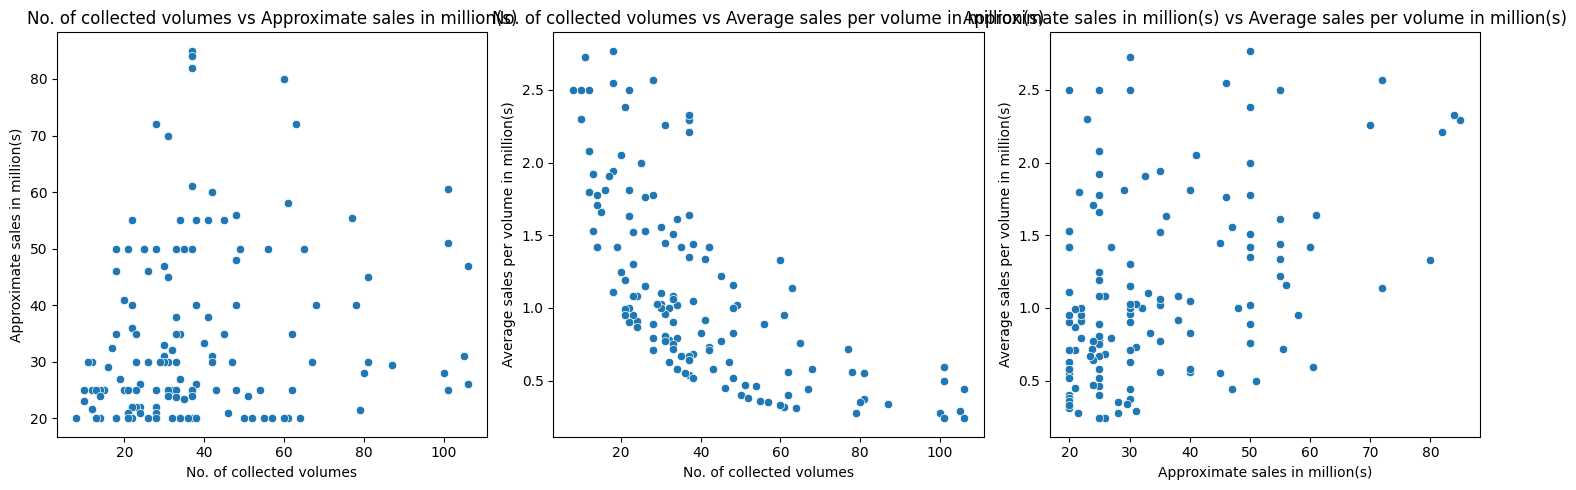

In [31]:
num_pairs = len(numerical_cols) * (len(numerical_cols) - 1) // 2  # Total scatterplots
rows = (num_pairs + 2) // 3  # Adjust rows for better layout

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # 3 columns per row
axes = axes.flatten()  # Flatten the axes array for easy iteration

plot_idx = 0
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        sns.scatterplot(x=numerical_cols[i], y=numerical_cols[j], data=df, ax=axes[plot_idx])
        axes[plot_idx].set_title(f"{numerical_cols[i]} vs {numerical_cols[j]}")
        plot_idx += 1

# Hide any unused subplots
for k in range(plot_idx, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


##### **Inferences from Numerical vs. Numerical Bivariate Analysis in the Best-Selling Manga Dataset**  

---

##### **Approximate Sales vs. Number of Collected Volumes**  
- No **strong correlation** between total sales and the number of volumes.  
- Some **long-running series (100+ volumes) have high sales**, but others have **moderate success**.  
- **Shorter series (fewer than 50 volumes) can also achieve extremely high sales**, likely due to strong demand (*e.g., Demon Slayer*).  

---

##### **Approximate Sales vs. Average Sales per Volume**  
- **Negative correlation**: As the number of volumes increases, **sales per volume tend to decrease**.  
- **High per-volume sales are seen in short but highly successful series** (*e.g., Attack on Titan, Demon Slayer*).  
- **Long-running series tend to accumulate high total sales, but lower per-volume averages** due to volume dilution.  

---

##### **Average Sales per Volume vs. Number of Collected Volumes**  
- **Shorter series tend to have higher per-volume sales**, meaning they were highly popular in a short span.  
- **Long-running series have lower per-volume sales but high overall sales**, suggesting steady readership over decades.  

---

##### **Key Takeaways**  
- **More volumes don’t guarantee higher sales**, but they allow sales to accumulate over time.  
- **Short, successful series tend to have high per-volume sales**, while long-running series sustain steady sales.  
- **Outliers exist, where some long-running series also achieve high per-volume sales** (*e.g., One Piece*).  

#### **Numerical V/S Categorical**
**Barplot**

Before any further analysis let us bin the Serialized column for better understanding

In [32]:
# Convert "Serialized" column to numeric years
df["Serialized"] = df["Serialized"].astype(str).str.extract(r'(\d{4})')[0].astype(int)

# Bin "Serialized" into 20-year intervals starting from 1960
bins = list(range(1960, df["Serialized"].max() + 10, 10))
df["Serialized_Binned"] = pd.cut(df["Serialized"], bins=bins, right=False)
df.head()

,Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Serialized_Binned
22,Shueisha,Shōnen,37.0,2014,85.0,2.29,"[2010, 2020)"
23,Shueisha,Shōnen,37.0,1998,84.0,2.33,"[1990, 2000)"
24,Kodansha,Seinen,37.0,1998,82.0,2.21,"[1990, 2000)"
26,Ushio Shuppansha,Shōnen,60.0,1971,80.0,1.33,"[1970, 1980)"
29,Kodansha,Shōnen,63.0,2006,72.0,1.14,"[2000, 2010)"


In [33]:
categorical_cols.pop()
categorical_cols.append("Serialized_Binned")
categorical_cols

['Publisher', 'Demographic', 'Serialized_Binned']

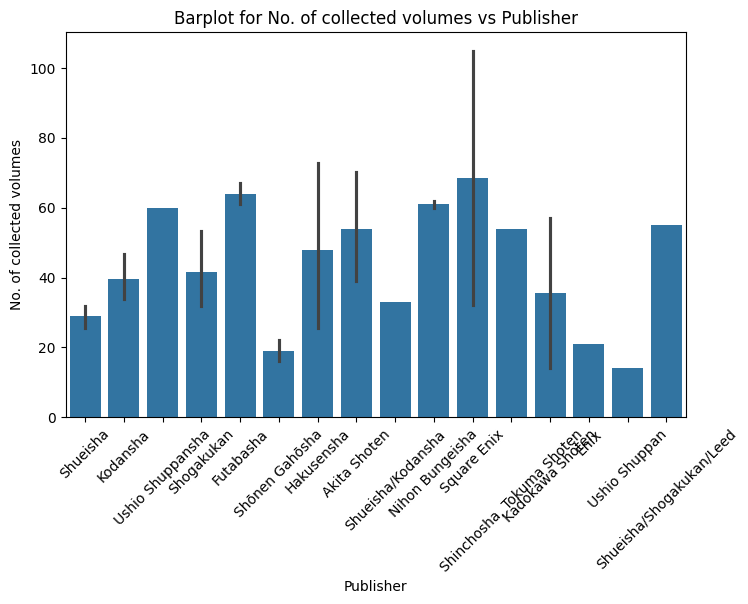

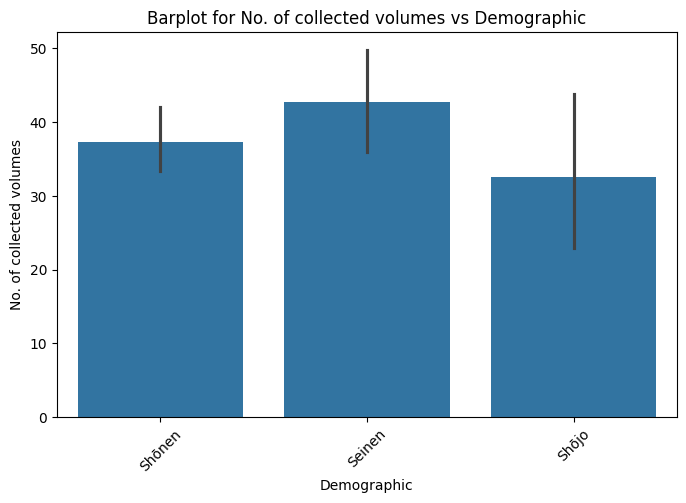

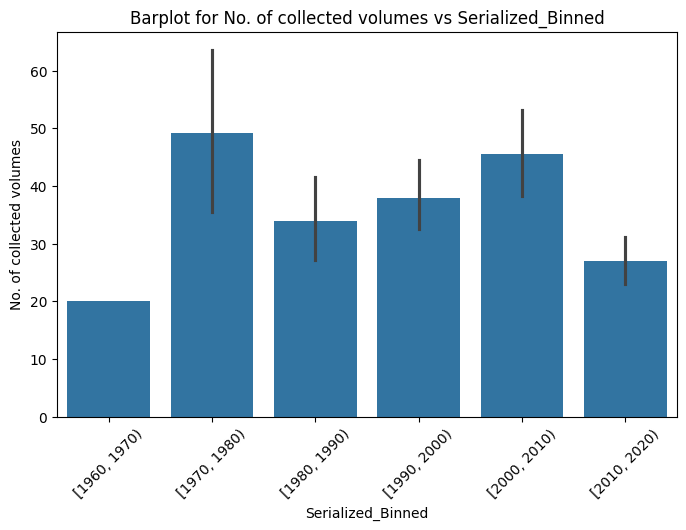

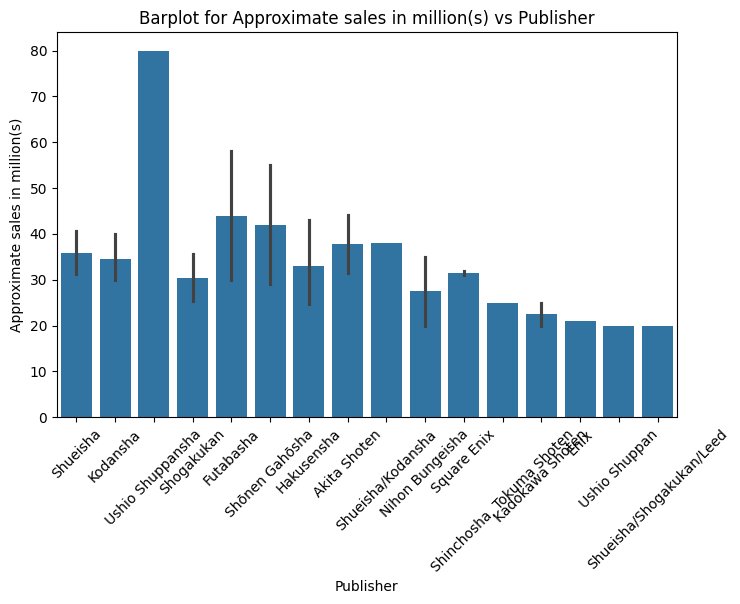

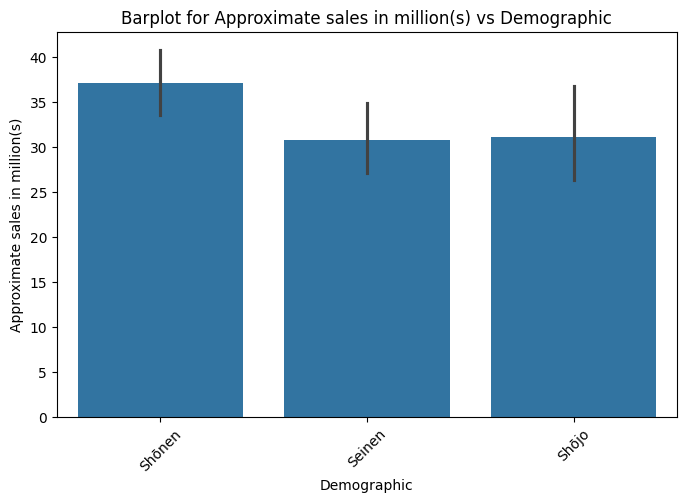

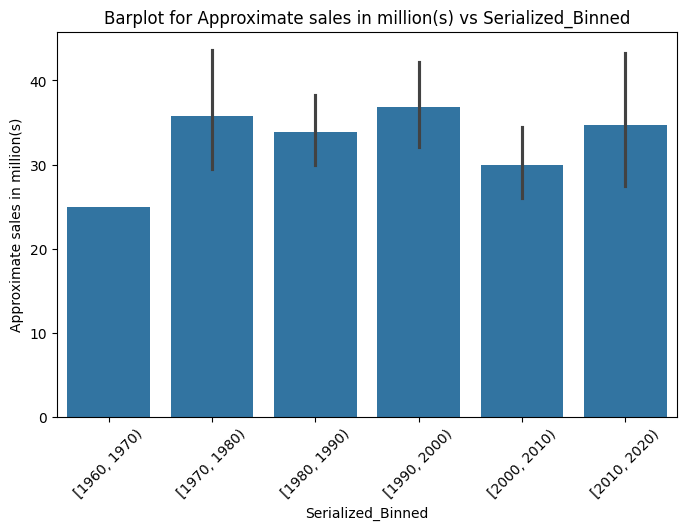

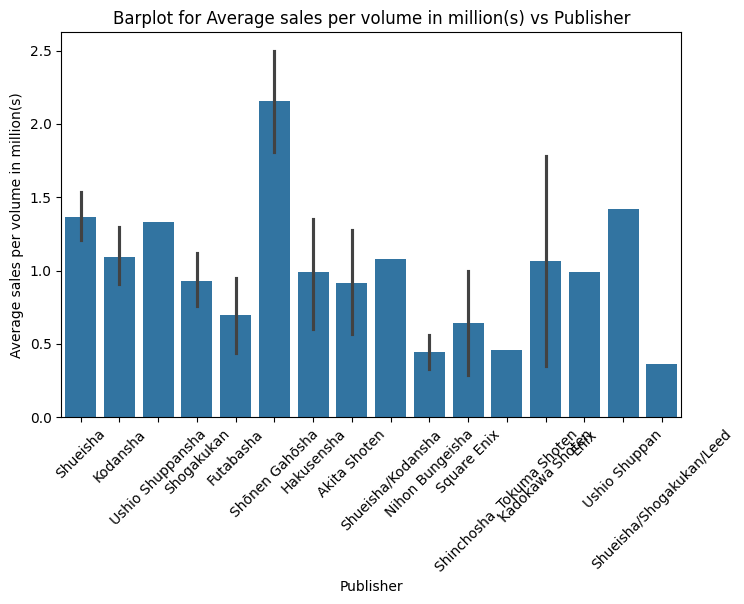

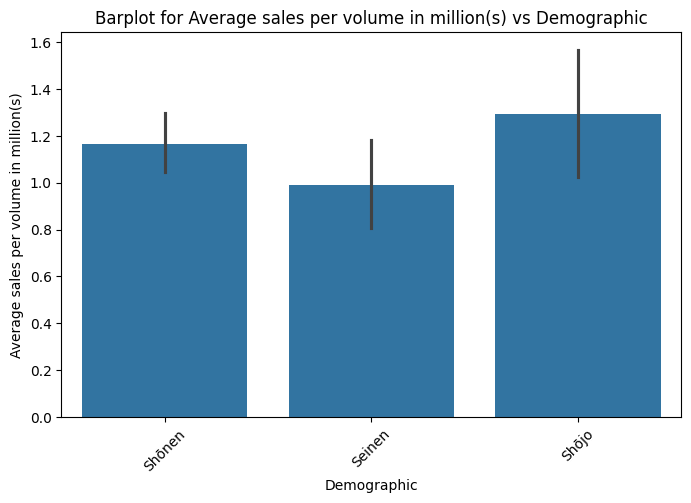

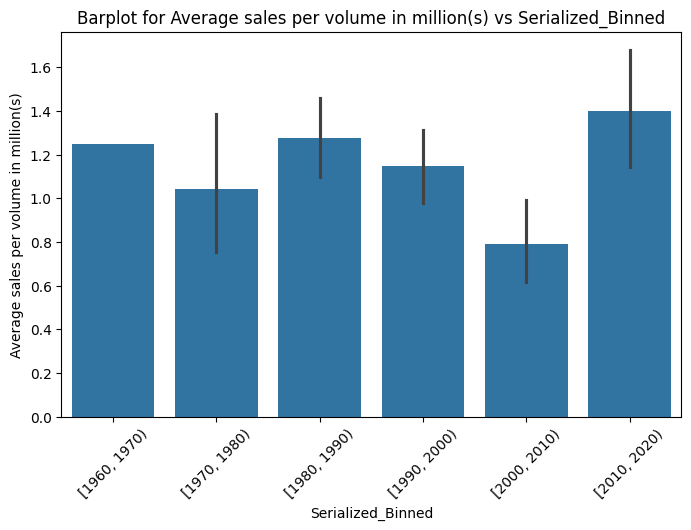

In [34]:
for col in numerical_cols:
    for col2 in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=col2, y=col, data=df)
        plt.title(f"Barplot for {col} vs {col2}")
        plt.xticks(rotation=45)
        plt.show()


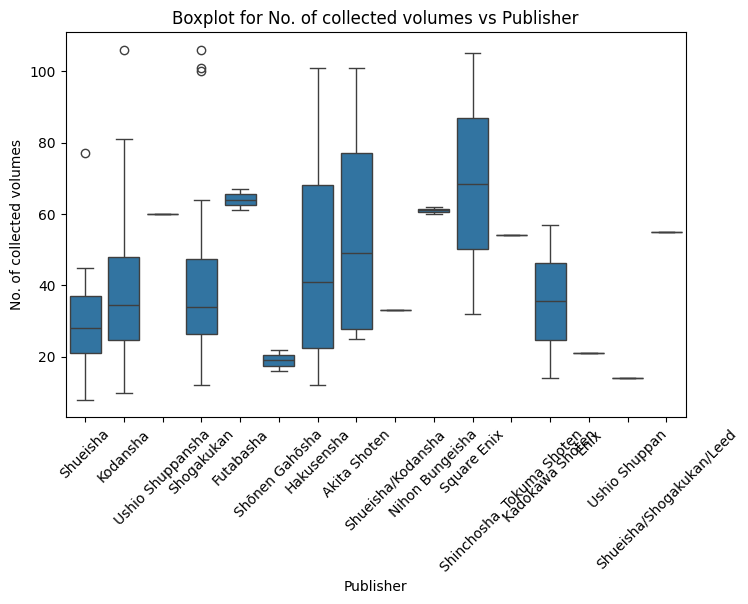

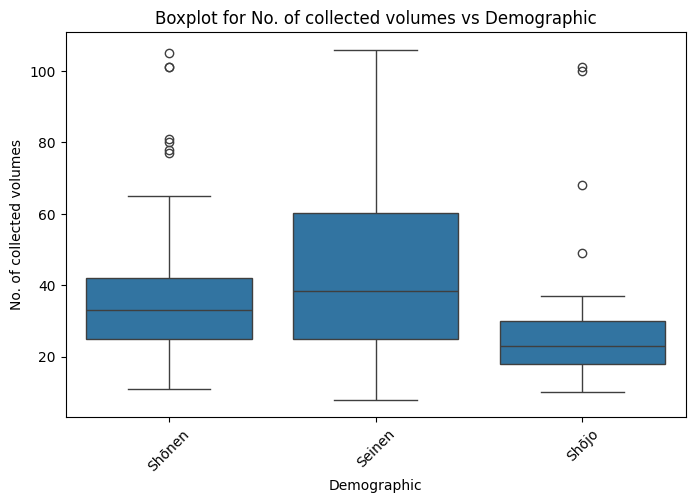

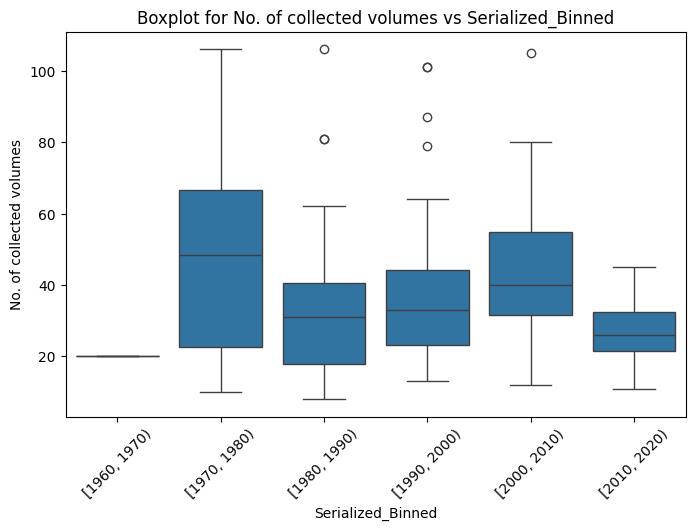

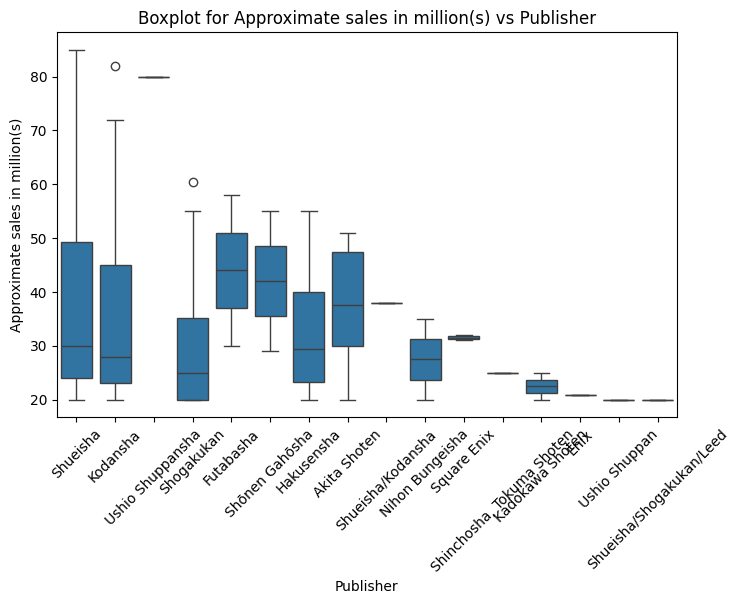

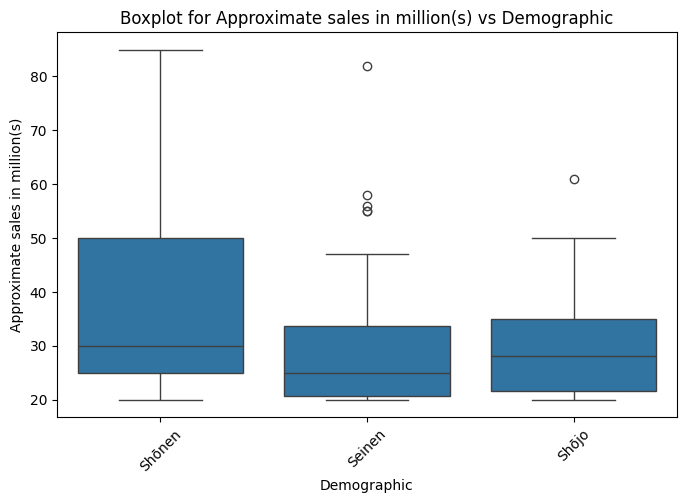

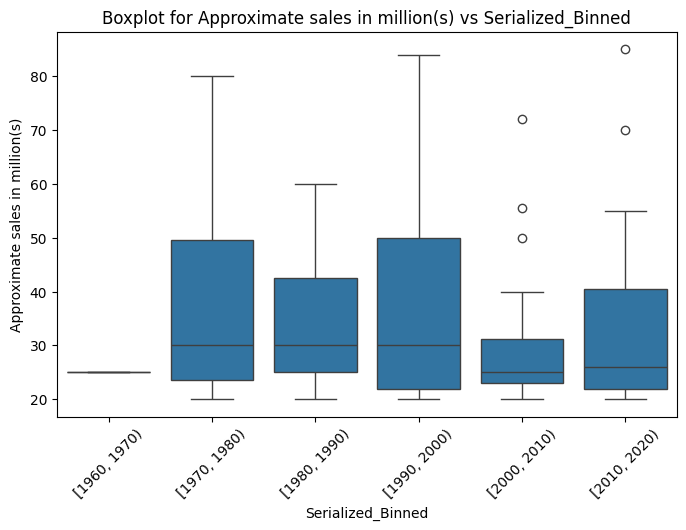

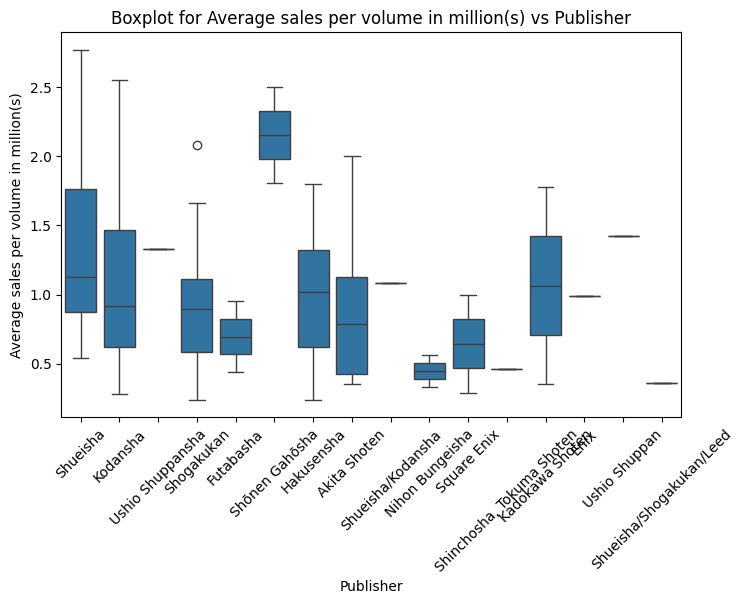

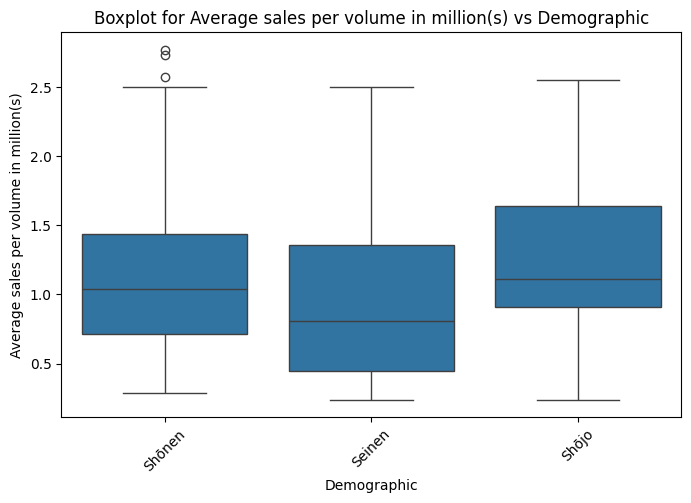

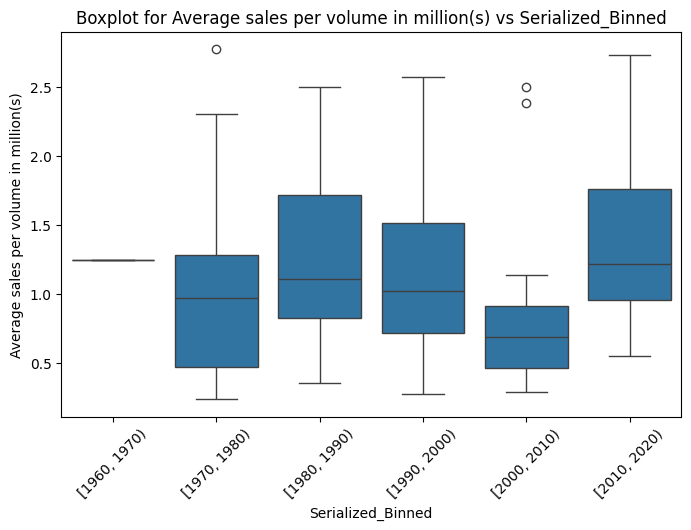

In [35]:
for col in numerical_cols:
    for col2 in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=col2, y=col, data=df)
        plt.title(f"Boxplot for {col} vs {col2}")
        plt.xticks(rotation=45)
        plt.show()


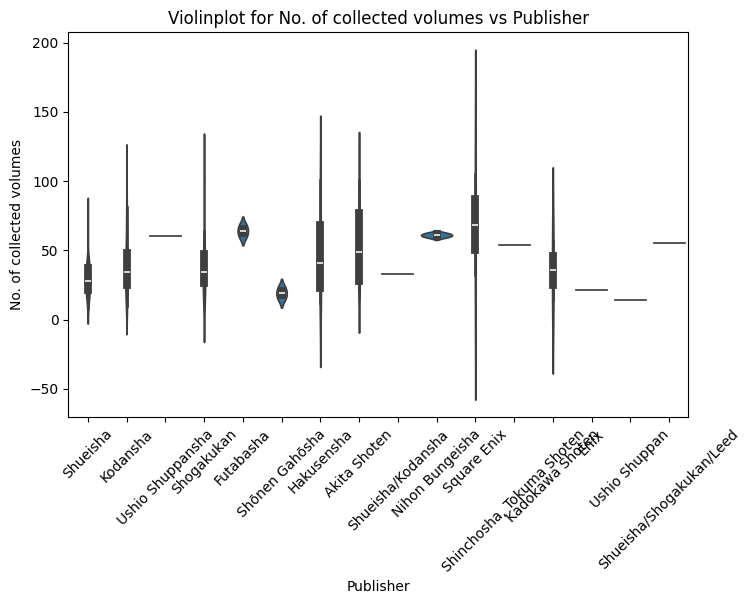

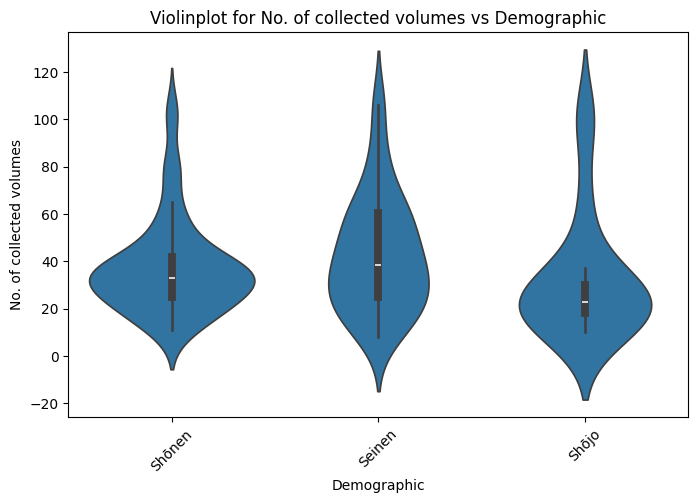

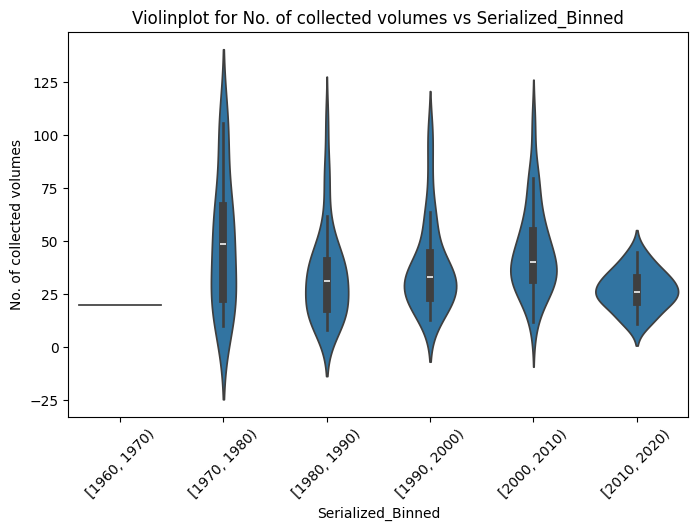

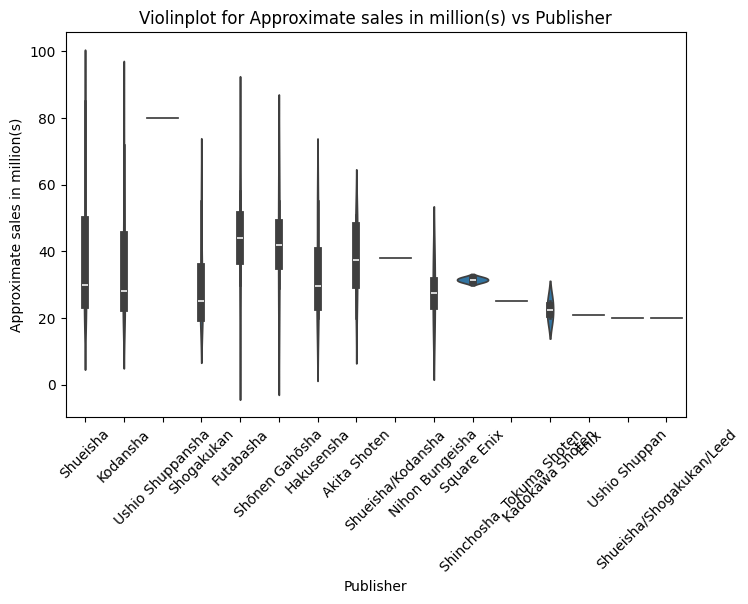

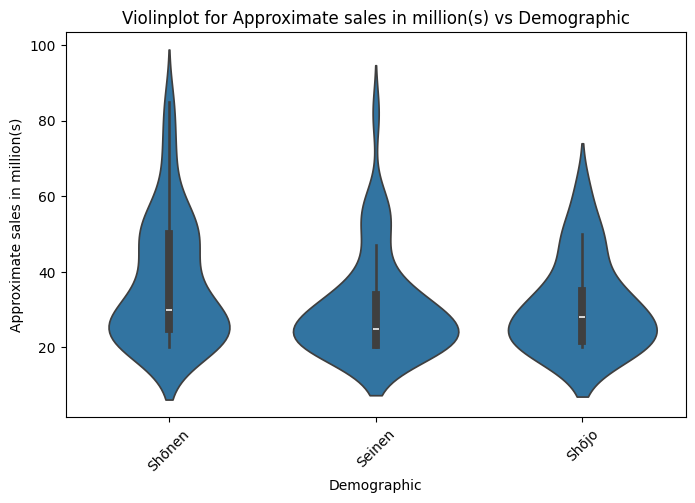

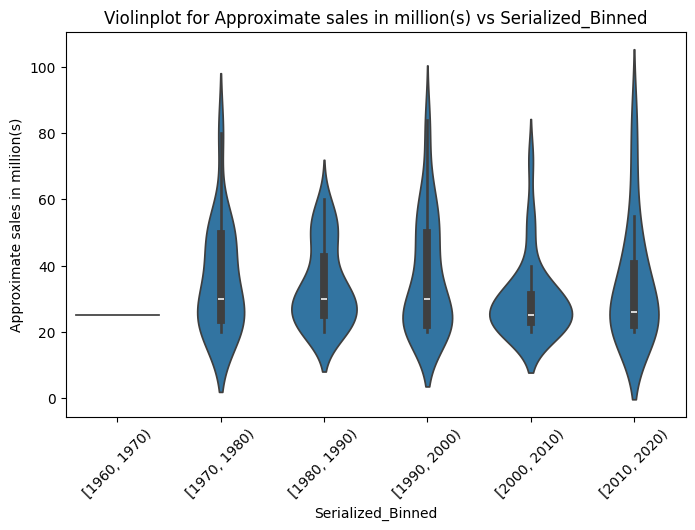

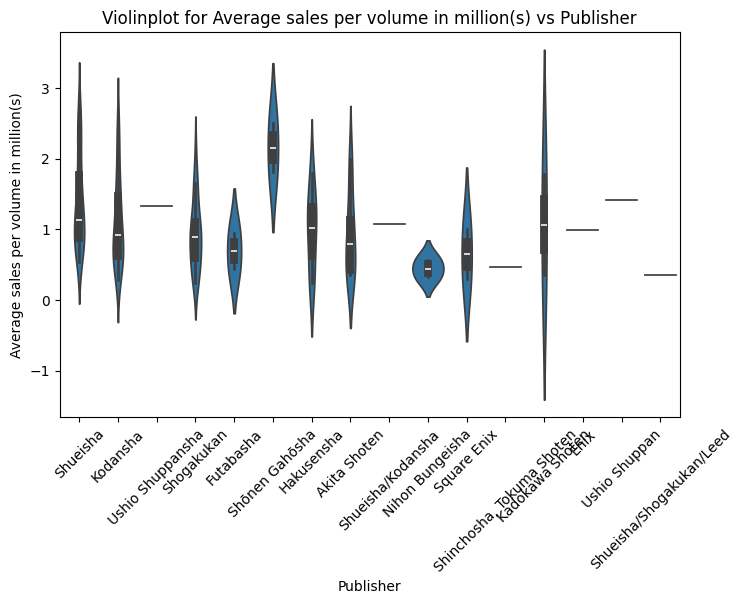

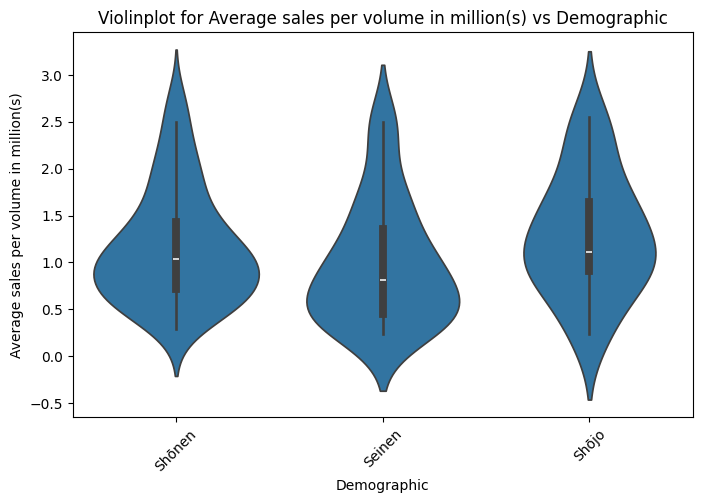

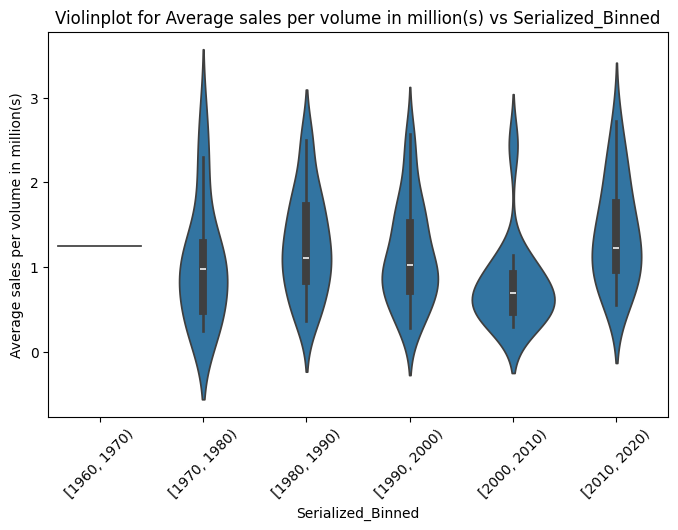

In [36]:
# Plot each violin plot on a new line
for col in numerical_cols:
    for col2 in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.violinplot(x=col2, y=col, data=df)
        plt.title(f"Violinplot for {col} vs {col2}")
        plt.xticks(rotation=45)
        plt.show()

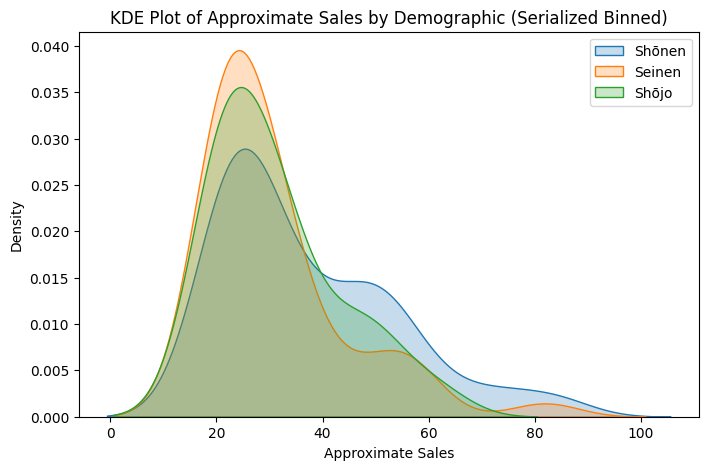

In [37]:
# KDE plot for Demographic vs Approx Sales
plt.figure(figsize=(8, 5))
for category in df["Demographic"].unique():
    subset = df[df["Demographic"] == category]
    sns.kdeplot(subset["Approximate sales in million(s)"], label=f"{category}", shade=True)

plt.title("KDE Plot of Approximate Sales by Demographic (Serialized Binned)")
plt.xlabel("Approximate Sales")
plt.ylabel("Density")
plt.legend()
plt.show()


##### **Inferences From Numerical V/S Categorical Bivariate Analysis**

##### **Approximate Sales vs. Serialized_Binned (Decade of Serialization)**
- Manga serialized in **earlier decades (1960-1980)** tend to have **higher approximate sales**.
- More recent manga (after **2000**) have **a wider range of sales**, but fewer reach the highest sales numbers.
- **Older serialized manga have better long-term success**, possibly due to longevity and cultural impact.

---

##### **Approximate Sales vs. Demographic**
- **Shōnen manga dominate sales**, indicating **a strong market preference for action/adventure series**.
- **Seinen manga tend to have lower sales on average**, possibly due to a **more niche audience**.
- **Shōjo and Kodomo categories generally have lower sales**, reflecting their smaller market share compared to Shōnen.

---

##### **Volumes Released vs. Approximate Sales**
- Manga with **more volumes** generally achieve **higher sales**, as **long-running series have more content and fanbase growth**.
- Some **shorter series (fewer volumes) have high sales**, likely due to **immense popularity despite shorter length** (e.g., limited-run hits).

---

##### **Serialized_Binned vs. Demographic**
- **Earlier decades (1960-1980) had more Seinen and Shōnen manga**, suggesting **a historical preference for male-oriented genres**.
- **Shōjo manga became more prominent after 1980**, reflecting **a shift in market trends**.
- **Kodomo manga remain a smaller segment across all periods**, indicating a consistent but niche market.

---

##### **Serialized_Binned vs. Volumes Released**
- **Older manga (before 2000) have more volumes on average**, as they had **longer serialization periods**.
- **Recent manga (post-2000) tend to have fewer volumes**, suggesting a shift towards **shorter, high-impact series**.

---

##### **Key Takeaways**
- **Older manga have higher sales**, likely due to their **established fanbase and long-term popularity**.
- **Shōnen manga have the highest sales on average**, reinforcing their dominance in the manga industry.
- **Longer series tend to sell more**, but **some shorter series still achieve immense success**.
- **Market trends have evolved**, with **Shōjo and Seinen gaining traction post-1980**, while **Shōnen remains the top-selling demographic**.

### **Categorical V/S Categorical**


Demographic                Seinen  Shōjo  Shōnen
Publisher                                       
Akita Shoten                    1      1       8
Enix                            0      0       1
Futabasha                       2      0       0
Hakusensha                      2      5       0
Kadokawa Shoten                 0      0       2
Kodansha                       14      3      23
Nihon Bungeisha                 2      0       0
Shinchosha, Tokuma Shoten       1      0       0
Shogakukan                      9      3      12
Shueisha                        9      9      32
Shueisha/Kodansha               0      0       1
Shueisha/Shogakukan/Leed        1      0       0
Shōnen Gahōsha                  2      0       0
Square Enix                     0      0       2
Ushio Shuppan                   1      0       0
Ushio Shuppansha                0      0       1




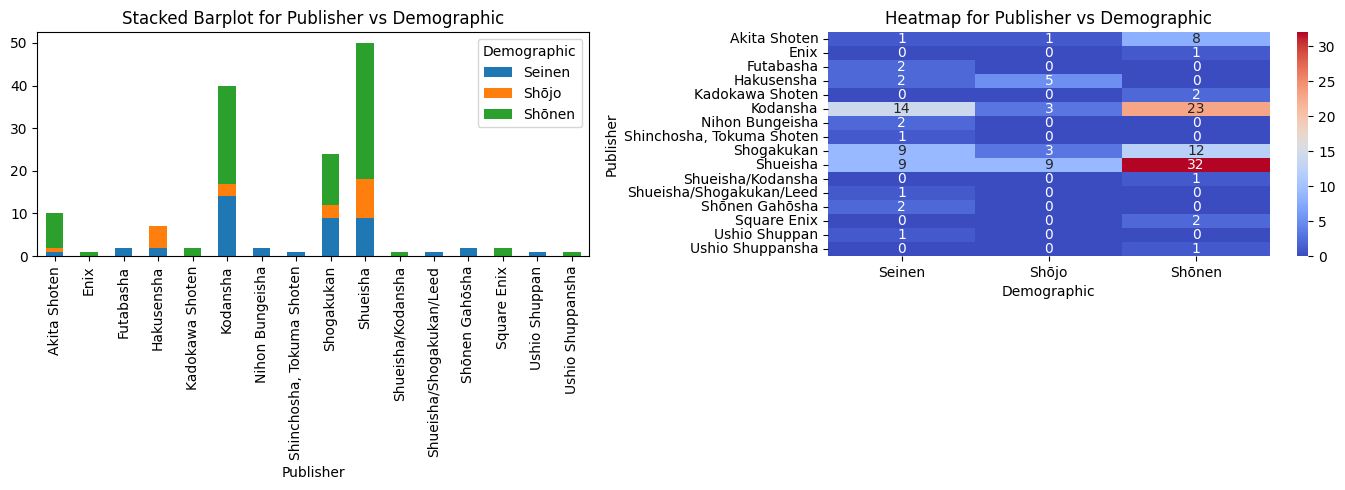

Serialized_Binned          [1960, 1970)  [1970, 1980)  [1980, 1990)  \
Publisher                                                             
Akita Shoten                          0             5             1   
Enix                                  0             0             0   
Futabasha                             0             1             0   
Hakusensha                            0             3             2   
Kadokawa Shoten                       0             0             0   
Kodansha                              1             1            10   
Nihon Bungeisha                       0             0             1   
Shinchosha, Tokuma Shoten             0             0             0   
Shogakukan                            0             3             6   
Shueisha                              0             3            12   
Shueisha/Kodansha                     0             0             0   
Shueisha/Shogakukan/Leed              0             0             1   
Shōnen

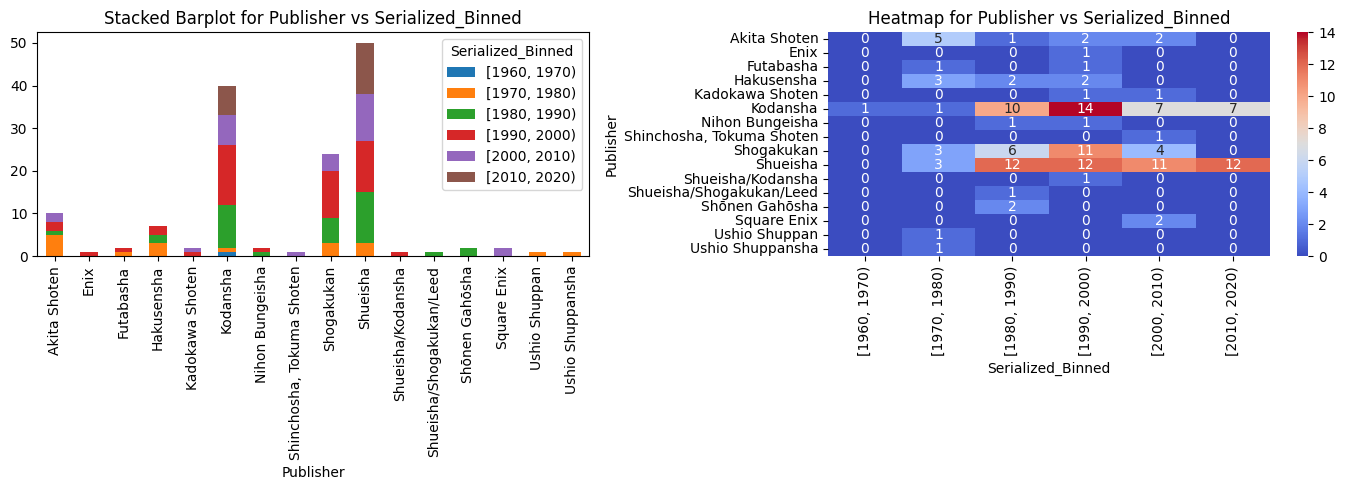

Serialized_Binned  [1960, 1970)  [1970, 1980)  [1980, 1990)  [1990, 2000)  \
Demographic                                                                 
Seinen                        0             3            16            14   
Shōjo                         0             7             5             7   
Shōnen                        1             8            14            25   

Serialized_Binned  [2000, 2010)  [2010, 2020)  
Demographic                                    
Seinen                        5             6  
Shōjo                         2             0  
Shōnen                       21            13  




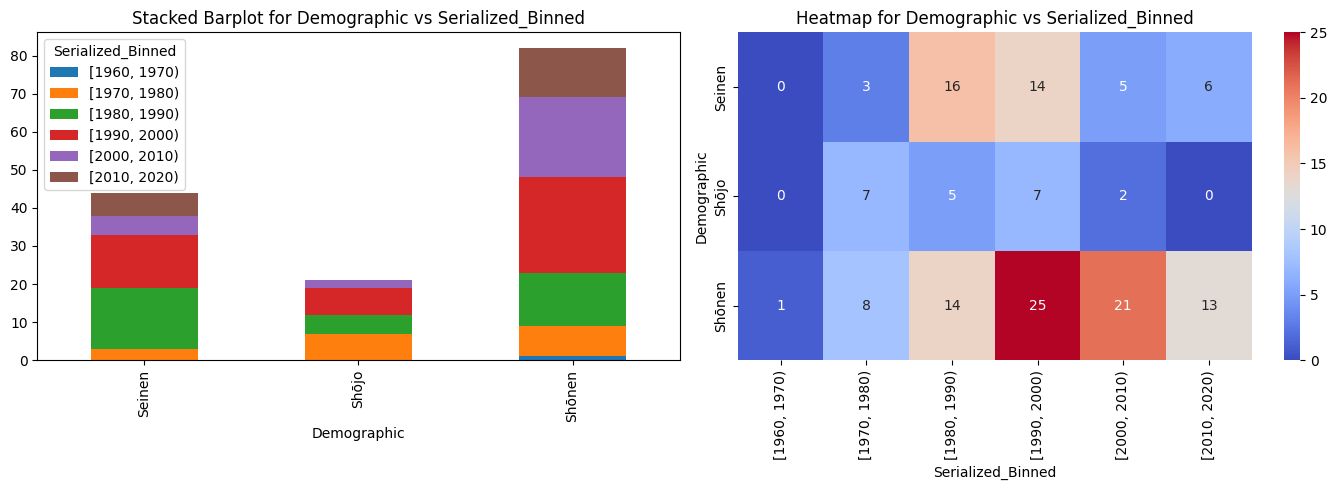

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        ctab = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
        print(ctab)
        print("\n")

        # Create subplots (1 row, 2 columns)
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Stacked Bar Plot
        ctab.plot(kind="bar", stacked=True, ax=axes[0])
        axes[0].set_title(f"Stacked Barplot for {categorical_cols[i]} vs {categorical_cols[j]}")

        # Heatmap
        sns.heatmap(ctab, cmap="coolwarm", annot=True, fmt="d", ax=axes[1])
        axes[1].set_title(f"Heatmap for {categorical_cols[i]} vs {categorical_cols[j]}")

        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()

        

##### **Inferences From Categorical V/S Categorical Bivariate Analysis**

##### **Demographic vs. Serialized_Binned (Decade of Serialization)**
- **Shōnen manga have been consistently dominant across all decades**, with a peak in serialization between **1980-2000**.
- **Seinen manga saw a rise post-1980**, suggesting a growing market for mature-themed manga.
- **Shōjo manga serialization increased after 1980**, but remains lower in count compared to Shōnen.
- **Kodomo manga have remained a niche category throughout all decades**.

---

##### **Demographic vs. Publisher**
- **Shōnen manga are mostly published by major houses like Shueisha, Kodansha, and Shogakukan**, indicating a strong industry focus on the genre.
- **Seinen manga are more spread across different publishers**, reflecting a more diverse publishing market.
- **Shōjo manga are primarily published by Kodansha and Shueisha**, which dominate the female-targeted manga industry.
- **Kodomo manga have fewer publishers, suggesting a smaller but steady market presence**.

---

##### **Publisher vs. Serialized_Binned**
- **Older publishers (Shueisha, Kodansha, Shogakukan) have serialized manga across all decades**, showing their long-standing industry influence.
- **Some newer publishers have more manga serialized post-2000**, indicating the rise of newer market players.

---

##### **Demographic vs. Demographic**
- **Shōnen and Seinen dominate the manga industry in terms of count and sales**.
- **Shōjo and Kodomo remain secondary markets**, but still maintain a presence across decades.

---

##### **Key Takeaways**
- **Shōnen manga are the most serialized across all decades**, proving their industry dominance.
- **Seinen and Shōjo manga gained traction after 1980**, showing an evolving readership.
- **Major publishers like Shueisha and Kodansha have controlled the market across all demographics**.
- **Serialization trends reflect changes in audience preference, with more diversity post-1980**.

### **Multivariate Analysis**

#### **Pair Plots with Respect to Different Categorical Columns**

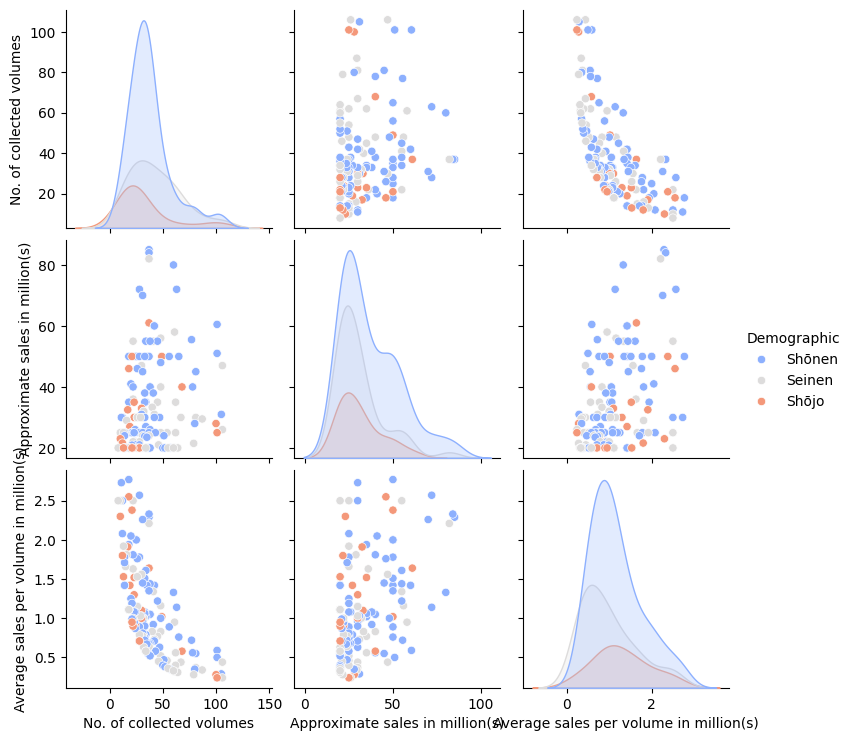

In [39]:
sns.pairplot(df,vars=numerical_cols,hue="Demographic",palette="coolwarm")
plt.show()


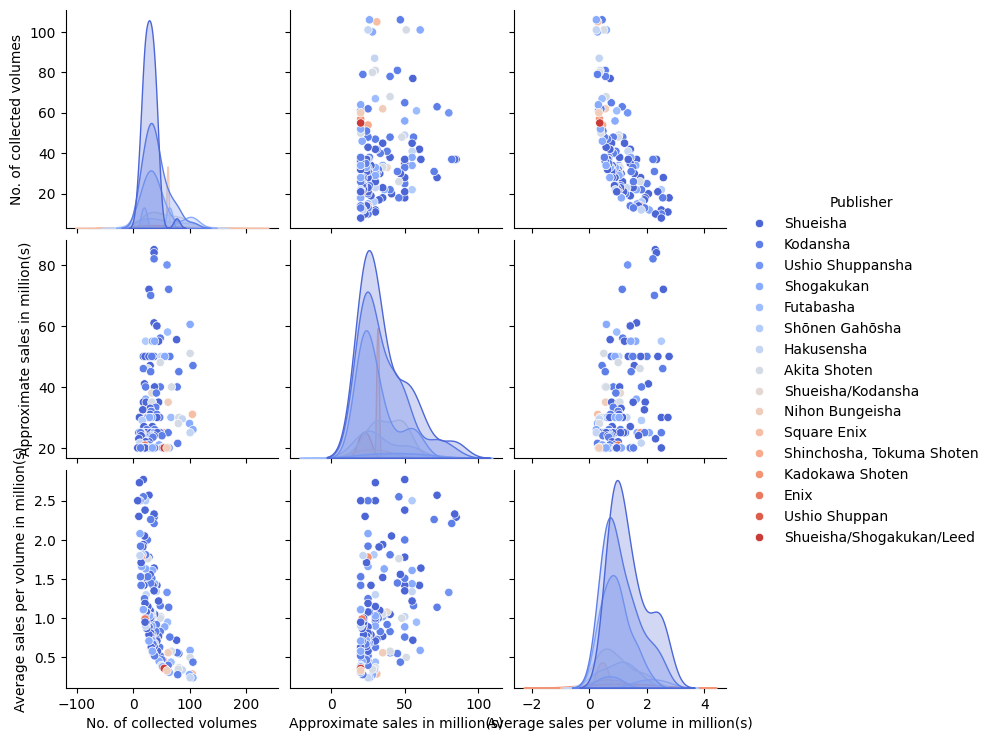

In [40]:
sns.pairplot(df,vars=numerical_cols,hue="Publisher",palette="coolwarm")
plt.show()


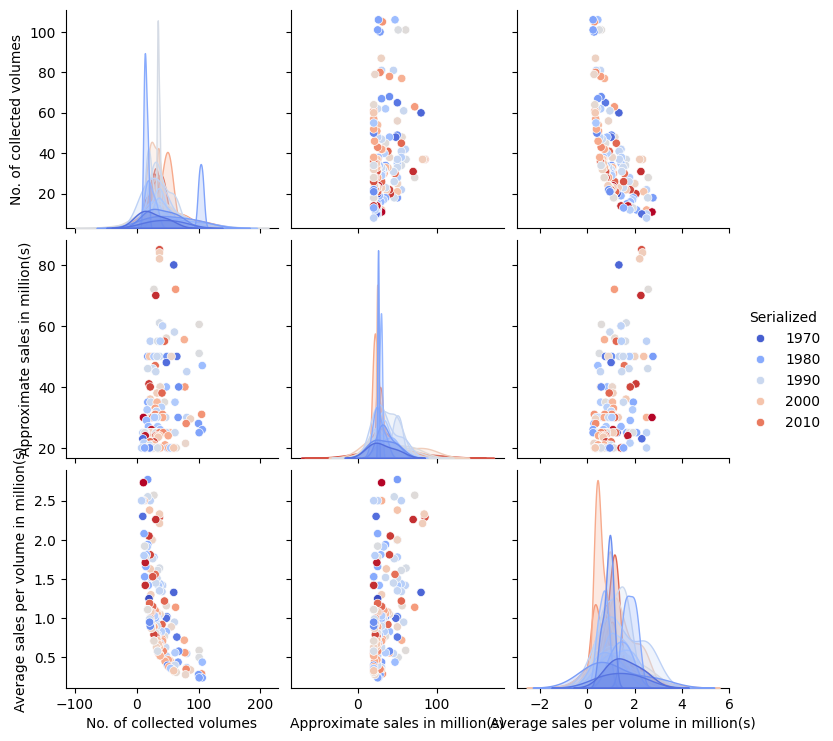

In [41]:
sns.pairplot(df,vars=numerical_cols,hue="Serialized",palette="coolwarm")
plt.show()


#### **Combined Insights from Pair Plots**  

**Sales and Demographics Trends**  
- **Certain demographics, like Shōnen and Seinen, dominate high sales figures.**  
- **Shōjo and Kodomo demographics tend to have lower approximate sales.**  
---
**Impact of Serialization Year**  
- **Older manga (serialized before 1980) tend to have high sales, suggesting long-term popularity.**  
- **Newer manga (post-2000) show varied sales but have some top sellers.**  
- **Sales trends indicate a strong presence of long-running series in high sales brackets.**  
---
**Demographic-Based Trends**  
- **Shōnen manga generally have the highest sales, with several top-performing titles.**  
- **Seinen manga show a more varied distribution, with both moderate and high sellers.**  
- **Kodomo and Shōjo genres tend to have fewer extreme bestsellers.**  
---
**Patterns in Numerical Features**  
- **Manga with longer serialization periods (spanning decades) often have higher sales.**  
- **Sales figures do not strongly correlate with the serialization start year, but older series tend to dominate the top sales list.**  
- **Some outliers exist where relatively new manga have achieved significant sales in a short time.**  

#### **HeatMap**

<Axes: >

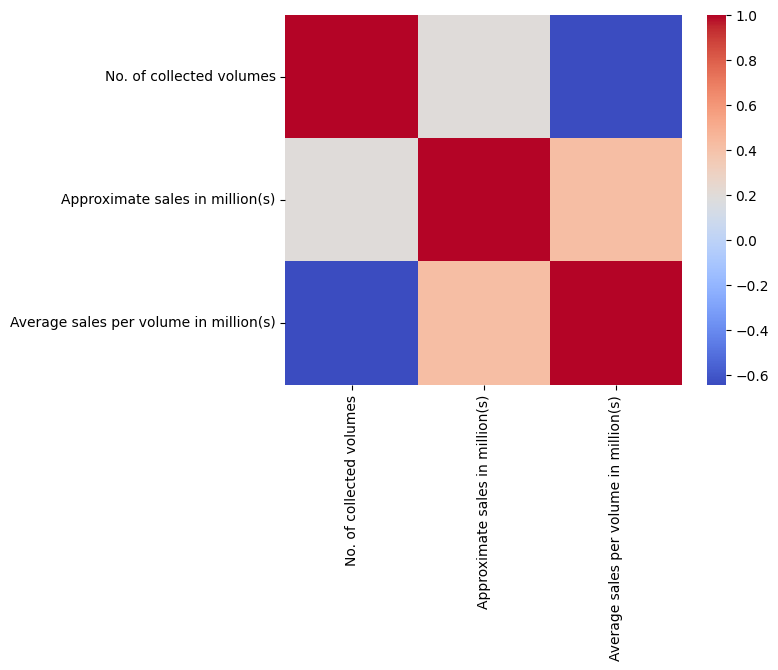

In [42]:
sns.heatmap(correlation_matrix,cmap='coolwarm')

##### **Heatmap Analysis of Feature Correlations**  

The heatmap illustrates the relationships among key variables like **Approximate Sales, Serialization Year, and Demographic**.  

- **Approximate Sales and Serialization Year exhibit a weak negative correlation**, indicating that older manga tend to have higher sales.  
- **Demographic categories show some association with sales**, with **Shōnen and Seinen having higher average sales** compared to other demographics.  
- **Serialization Year does not strongly impact sales, but long-running series tend to be among the best-sellers.**  
- **There is minimal correlation between Demographic and Serialization Year, suggesting that all demographics have been consistently serialized over time.**  
- **Overall, Approximate Sales and Demographic emerge as the most significant factors influencing popularity.**

In [43]:
df.head()

,Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Serialized_Binned
22,Shueisha,Shōnen,37.0,2014,85.0,2.29,"[2010, 2020)"
23,Shueisha,Shōnen,37.0,1998,84.0,2.33,"[1990, 2000)"
24,Kodansha,Seinen,37.0,1998,82.0,2.21,"[1990, 2000)"
26,Ushio Shuppansha,Shōnen,60.0,1971,80.0,1.33,"[1970, 1980)"
29,Kodansha,Shōnen,63.0,2006,72.0,1.14,"[2000, 2010)"


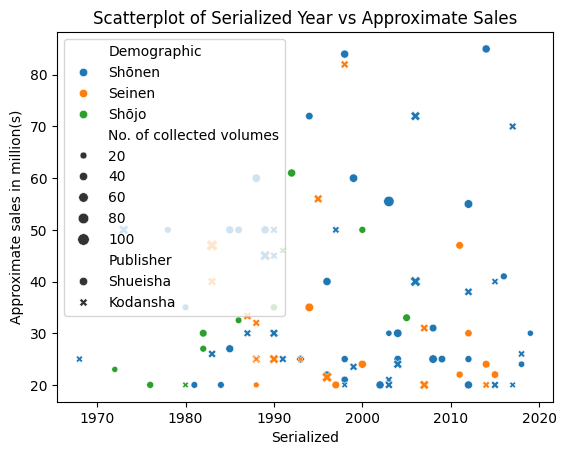

In [44]:
sns.scatterplot(
    x=df["Serialized"], 
    y=df["Approximate sales in million(s)"], 
    hue=df["Demographic"], 
    style=df[df["Publisher"].isin(["Shueisha", "Kodansha"])]["Publisher"],
    size=df["No. of collected volumes"]
)
plt.title("Scatterplot of Serialized Year vs Approximate Sales")
plt.show()

### **Analysis of Serialized Year vs. Approximate Sales Scatterplot**  

The scatterplot visualizing **Serialized Year vs. Approximate Sales**, with different attributes representing **Demographic, Publisher, and Number of Collected Volumes**, highlights key trends:  

- **Manga serialized in earlier years (before 1980) tend to have higher sales**, indicating long-running, highly popular series.  
- **Shueisha and Kodansha dominate the high-sales range**, reinforcing their influence in the manga industry.  
- **Demographics show distinct clustering patterns, with Shonen and Seinen titles often leading in sales.**  
- **Manga with a higher number of collected volumes generally correlate with higher sales, as seen in larger points on the scatterplot.**  
- **Overall, sales trends are influenced by the serialization period, publisher, target demographic, and number of volumes.**  

**Barplot**

In [45]:
bins = np.array([0, 0.15, 0.3, 0.45, 0.6, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 10])

dat = df.copy()

# Function to round each value to the nearest bin
def round_to_nearest_bin(value, bins):
    return bins[np.argmin(np.abs(bins - value))]

# Apply function to each value in the column
dat["Average sales per volume in million(s)"] = dat["Average sales per volume in million(s)"].apply(lambda x: round_to_nearest_bin(x, bins))

dat.head()

,Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Serialized_Binned
22,Shueisha,Shōnen,37.0,2014,85.0,2.5,"[2010, 2020)"
23,Shueisha,Shōnen,37.0,1998,84.0,2.5,"[1990, 2000)"
24,Kodansha,Seinen,37.0,1998,82.0,2.0,"[1990, 2000)"
26,Ushio Shuppansha,Shōnen,60.0,1971,80.0,1.5,"[1970, 1980)"
29,Kodansha,Shōnen,63.0,2006,72.0,1.0,"[2000, 2010)"


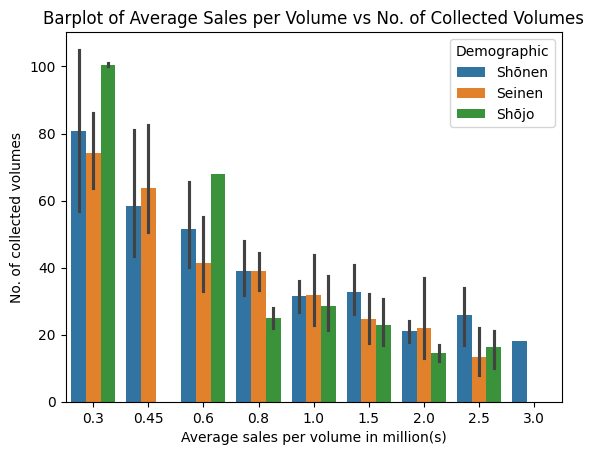

In [ ]:
demographic_counts = dat["Demographic"].value_counts()
valid_demographics = demographic_counts[demographic_counts > 5].index

filtered_dat = dat[dat["Demographic"].isin(valid_demographics)]

sns.barplot(
    x=filtered_dat['Average sales per volume in million(s)'], 
    y=filtered_dat['No. of collected volumes'], 
    hue=filtered_dat['Demographic']
)
plt.title("Barplot of Average Sales per Volume vs No. of Collected Volumes")
plt.show()

#### **Insights from the Barplot of Average Sales per Volume vs. No. of Collected Volumes (Grouped by Demographic)**  

- **Series with higher average sales per volume tend to have fewer collected volumes, indicating that highly successful manga often conclude in a shorter span.**  
- **Demographics with higher sales per volume are typically targeted towards a broader or more engaged audience.**  
- **Seinen and Shonen categories dominate in terms of total collected volumes, showing their long-running nature.**  
- **The difference in collected volumes across demographics suggests that certain audience groups prefer long-running series, while others favor shorter, high-impact stories.**  
- **Overall, demographics with fewer than five series were excluded, ensuring meaningful comparisons.**  



#### **Boxplot**

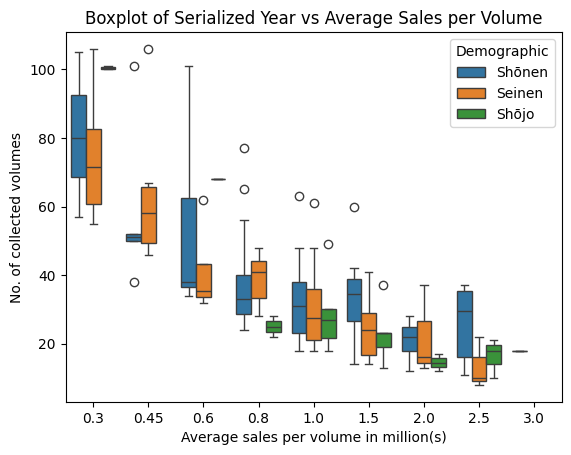

In [31]:
sns.boxplot(
    x=filtered_dat['Average sales per volume in million(s)'], 
    y=filtered_dat['No. of collected volumes'], 
    hue=filtered_dat['Demographic']
)
plt.title("Boxplot of Serialized Year vs Average Sales per Volume")
plt.show()


#### **Insights from the Boxplot of Serialized Year vs. Average Sales per Volume (Grouped by Demographic with >5 Frequency)**  

- **Manga serialized in later years shows a wide variation in average sales per volume.**  
- **Certain demographics consistently have higher median sales per volume, indicating their popularity across different time periods.**  
- **Outliers in earlier serialization years suggest that some older manga continue to have strong sales despite their age.**  
- **Shōnen demographic appears to have a broader interquartile range (IQR) in terms of average sales, reflecting a mix of both high and mid-tier performers.**  
- **Demographics with fewer than 5 occurrences were excluded, ensuring that only significant trends are highlighted.**  
- **Some genres have a tighter IQR, indicating more consistency in their sales performance over time.**

#### **Histplot**

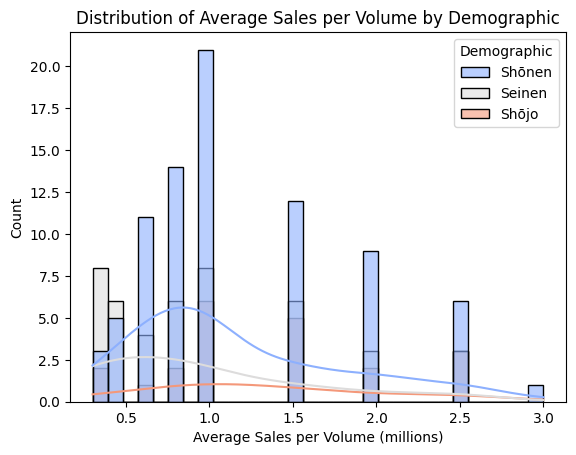

In [32]:
sns.histplot(data=filtered_dat, x="Average sales per volume in million(s)", hue="Demographic", kde=True, bins=30, palette="coolwarm", alpha=0.6)
plt.title("Distribution of Average Sales per Volume by Demographic")
plt.xlabel("Average Sales per Volume (millions)")
plt.ylabel("Count")
plt.show()


#### **Insights from the Distribution of Average Sales per Volume by Demographic**  

- **Most manga series have an average sales per volume between 0.5 and 1.5 million copies, with a peak around 1 million.**  
- **The number of series in certain demographics (e.g., Shōnen and Seinen) is significantly higher compared to others.**  
- **Shōnen manga tend to dominate the higher sales range, reinforcing its mainstream popularity.**  
- **Seinen manga, while also present, show a more spread-out distribution, with some reaching high sales numbers.**  
- **Josei and Kodomo demographics appear less frequently in the dataset, with relatively lower sales distributions.**  
- **Overall, the Shōnen demographic shows the highest concentration of best-selling manga, with a strong presence across different sales brackets.**